In [1]:
import matplotlib.pyplot as plt
from shared_modules import load_dill_vars, get_times, graph_time

Loading Variables

In [2]:
twitter_vars = load_dill_vars("twitter")
reddit_vars = load_dill_vars("reddit")

Time Calculation

In [3]:
twitter_times = get_times(twitter_vars)
reddit_times = get_times(reddit_vars)

Time Graphs

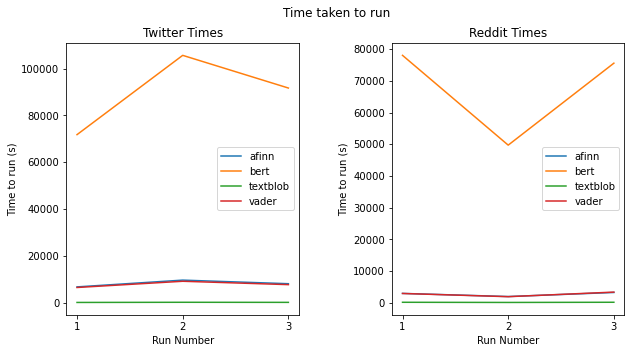

In [5]:
graph_time(twitter_times, reddit_times, "sentiment_graphs/time_taken.png")